# Load Package

In [1]:
#https://github.com/YuTaNCCU/201902_ANN_Metaheuristic/tree/master/ES
import random
import pandas as pd
from string import ascii_lowercase
from copy import deepcopy
from abc import ABCMeta, abstractmethod
from copy import deepcopy
from collections import deque
from numpy import argmax
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential 
from keras.callbacks import TensorBoard,EarlyStopping
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss
import  seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load Data

In [2]:
url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/red.csv'
red = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/YuTaNCCU/201902_ANN_Metaheuristic/master/Data/white.csv'
white = pd.read_csv(url)

red['WineCatg']='red'
white['WineCatg']='white'
Wine_Data = pd.concat([red, white])

display(
    red.shape,
  white.shape,
  Wine_Data.shape,
  Wine_Data.head(5),
  Wine_Data.tail(5)
)

(1599, 13)

(4898, 13)

(6497, 13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,WineCatg
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [3]:
Wine_Data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'WineCatg'],
      dtype='object')

In [4]:
from sklearn import preprocessing
Wine_Data_preprocessed = Wine_Data.drop(['WineCatg'], axis=1)
scaler = preprocessing.StandardScaler() 
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Wine_Data_preprocessed[col] = scaler.fit_transform(Wine_Data_preprocessed[col])
Wine_Data_preprocessed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,5
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,5
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,6
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5


In [5]:
print( '原本各種quality記數: \n', Wine_Data.quality.value_counts().sort_index() )
Wine_Data_Y01 = Wine_Data_preprocessed.replace({'quality':[3,4,5,6,7,8,9]},{'quality':[3,4,5,6,7,8,9]})
print( '分類成好壞兩種quality記數: \n', Wine_Data_Y01.quality.value_counts().sort_index() )
Wine_Data_Y01.head(5)

原本各種quality記數: 
 3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64
分類成好壞兩種quality記數: 
 3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862605,0.701486,-0.115073,0.999579,-0.580068,5
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092603,0.768188,0.258120,0.797958,-0.580068,5
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986450,1.101694,-0.363868,0.327510,-0.580068,6
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446446,1.034993,1.813090,0.193097,-0.915464,5


In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Wine_Data_Y01['quality'])
encoded_Y = encoder.transform(Wine_Data_Y01['quality'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [7]:
dummy_y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X=Wine_Data_Y01.drop(['quality'], axis=1)
y=dummy_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,shuffle = True, random_state= 12)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train ,shuffle = True, random_state= 12)

display(
      X_train.shape,
      X_val.shape,
      X_test.shape,
      y_train.shape,
      y_val.shape,
      y_test.shape,
)

(4157, 11)

(1040, 11)

(1300, 11)

(4157, 7)

(1040, 7)

(1300, 7)

# Define Performance

In [9]:
%%time
def score(model):
    # Predicting the Test set results
    y_score = model.predict(X_test) #X_train X_test
    from sklearn.metrics import roc_auc_score
    return round((roc_auc_score(y_test, y_score)*100),2)

def Optimize_SA(model = None , score = None , initT = 1000, minT = 1 , iterL = 5000 , delta = 0.95, k = 1, init_weights = None, structure = None):
    old_score = score(model)
    nowt = initT 
    # start SA!
    while nowt > minT:
        for i in range(iterL):
            # 初始舊權重計算分數
            # 製作新的權重
            xnew = init_weights + (np.random.rand(len(init_weights)) - 0.5)
            process_weights = UnflattenWeights(structure, xnew )
            model.set_weights(process_weights)
            new_score = score(model)
            # 計算分數差異
            res = new_score - old_score # auc score
            if res > 0:
                init_weights = xnew
                old_score = new_score          
    #             Performance(model)
            else:
                model.set_weights(UnflattenWeights(structure, init_weights ))
    #             p = np.exp(-res / (k * nowt))
    #             if np.random.rand() < p:
    #                 init_weights = xnew
    #                 old_score = new_score
    # #                 Performance(model)
    #             else:
    #                 pass
            nowt = nowt * delta
    return model

def FlattenWeights(weights):
        """
        flatten weights
        
        param weights: keras神經網路的權重格式:nparray包在list中
        return WeightsStrucure : 神經網路各層的權重shape包在list中，unflatten時會用到
        return FlattenedWeights : 一維list包含所有的權重
        """
        WeightsStrucure = []
        FlattenedWeights = []
        for i_layer in weights:
            WeightsStrucure.append(i_layer.shape)
            if len(i_layer.shape) == 1 :# 該層權重的shape為一維 e.g. (15,)      
                FlattenedWeights.extend(i_layer)
            else :# 該層權重的shape為二維 e.g. (30, 15)  
                for i_links in i_layer:
                    FlattenedWeights.extend(i_links)
        return WeightsStrucure, FlattenedWeights

def UnflattenWeights(WeightsStrucure, ModifiedWeights):
    """
    Unflatten(回復成原本的結構) weights  

    param WeightsStrucure : 神經網路各層的權重shape包在list中
    param ModifiedWeights : 一維list包含所有meteHeuristic修改過的權重
    return: keras神經網路的權重格式:nparray包在list中
    """
    UnflattenWeights = []
    i_index = 0 
    for i_layer in WeightsStrucure:
        if len(i_layer) == 1 : # 該層權重的shape為一維 e.g. (15,)      
            TempList = ModifiedWeights[i_index:(i_index + i_layer[0])]
            TempList = np.asarray(TempList)
            i_index = i_index + i_layer[0]
        else : # 該層權重的shape為二維 e.g. (30, 15)  
            TempList = ModifiedWeights[i_index:(i_index + (i_layer[0]*i_layer[1]))]
            TempList = np.reshape(TempList, i_layer )
            i_index = i_index + (i_layer[0]*i_layer[1])
        UnflattenWeights.append(TempList)
    return UnflattenWeights    

Wall time: 0 ns


## 二元分類Perfromance

In [9]:
def Performance(model):
    #######################
    ## Confusion Matrix  ##
    #######################

    # Predicting the Test set results
    y_score = model.predict(X_test) #X_train X_test
    y_pred = (y_score > 0.5)  

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred) #y_train y_test
    #######################
    ###    accuracy      ##
    #######################
    print("Our accuracy is {}%".format(round(((cm[0][0] + cm[1][1])/sum(sum(cm)))*100,2)))

    sns.heatmap(cm,annot=True)
    #######################
    ###       AUC        ##
    #######################    
    from sklearn.metrics import roc_auc_score
    print("Our AUC is {}%".format(round((roc_auc_score(y_test, y_score)*100),2)))
    
    #######################
    ###    ROC curve     ##
    #######################
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle

    from sklearn import svm, datasets
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import label_binarize
    from sklearn.multiclass import OneVsRestClassifier
    from scipy import interp
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #Plot of a ROC curve for a specific class
    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show() 

## 多元分類Performance

In [30]:
def Performance_multi(model):
    y_score = model.predict(X_test) #X_train X_test
    y_pred = []
    y_true = []
    for i in range(len(y_score)):
        y_pred.append(y_score[i].argmax())
        y_true.append(y_test[i].argmax())
        
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred) #y_train y_test
    
    print("Our accuracy is {}%".format(round(((cm[0][0] + cm[1][1] + cm[2][2] + cm[3][3] + cm[4][4] + cm[5][5] + cm[6][6] )/sum(sum(cm)))*100,2)))
    
    from sklearn.metrics import roc_auc_score
    print("Our AUC is {}%".format(round((roc_auc_score(y_test, y_score)*100),2)))

In [31]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC(model):
    y_score = model.predict(X_test) #X_train X_test

    # 计算每一类的ROC

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(6):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area（方法二）
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot all ROC curves
    lw=2
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','black','red','blue','yellow'])
    for i, color in zip(range(6), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

# Define Keras Model

In [35]:
def SummarizeHistory(modelcallbacks, prfix='', UseValid=False) :
    
    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'loss'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'loss'])  #val_loss 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()

    plt.figure()
    plt.plot(modelcallbacks.history[prfix+'acc'])  #loss mean_absolute_error 
    if UseValid==True:
        plt.plot(modelcallbacks.history['val_'+prfix+'acc'])  # val_mean_absolute_error
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()
    
def ModelCompile():
    from keras import backend as K
    from keras.layers import Dense
    from keras.models import Sequential, Model as keras_models_Model

    K.clear_session() 
    gpu_options = tf.GPUOptions(allow_growth=True)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    tf.keras.backend.set_session(sess)

    model = Sequential()
    model.add(Dense(round(X_train.shape[1]/2), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(round(X_train.shape[1]/2), activation='relu'))
    model.add(Dense(round(X_train.shape[1]/4), activation='relu', name = 'IntermediateLayer'))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

def ModelFit(model, weights, epochs):
    #class_weight = {0: 1., 1: 1525/2632}
    model.set_weights(weights)
    modelcallbacks = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1,
        validation_data = (X_val, y_val),
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=2, restore_best_weights=True)],
        shuffle=True) #, class_weight=class_weight
    SummarizeHistory(modelcallbacks, UseValid=True)                                        
    weights = model.get_weights() 
    return model, weights

# Main

## 只用BP

In [28]:
#只用NN
model = ModelCompile()
weights = model.get_weights() 
model, weights = ModelFit(model=model, weights=weights, epochs=150)
# Performance(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 28        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
Train on 4157 samples, validate on 1040 samples
Epoch 1/150
4157/4157 [==============================] - 1s 193us/step - loss: 1.8890 - acc: 0.3745 - val_loss: 1.8034 - val_acc: 0.3644
Epoch 2/150
4157/4157 [==============================] - 0s 107us/step - loss: 1.6327 - acc

4157/4157 [==============================] - 0s 96us/step - loss: 1.0471 - acc: 0.5576 - val_loss: 1.0620 - val_acc: 0.5548
Epoch 55/150
4157/4157 [==============================] - 0s 94us/step - loss: 1.0464 - acc: 0.5615 - val_loss: 1.0619 - val_acc: 0.5548
Epoch 56/150
4157/4157 [==============================] - 0s 91us/step - loss: 1.0458 - acc: 0.5653 - val_loss: 1.0620 - val_acc: 0.5577
Epoch 57/150
4157/4157 [==============================] - 0s 94us/step - loss: 1.0452 - acc: 0.5598 - val_loss: 1.0634 - val_acc: 0.5500
Epoch 58/150
4157/4157 [==============================] - 0s 92us/step - loss: 1.0454 - acc: 0.5622 - val_loss: 1.0603 - val_acc: 0.5596
Epoch 59/150
4157/4157 [==============================] - 0s 91us/step - loss: 1.0441 - acc: 0.5615 - val_loss: 1.0607 - val_acc: 0.5587
Epoch 60/150
4157/4157 [==============================] - 0s 90us/step - loss: 1.0435 - acc: 0.5641 - val_loss: 1.0604 - val_acc: 0.5587
Epoch 61/150
4157/4157 [==============================

NameError: name 'SummarizeHistory' is not defined

In [32]:
Performance_multi(model)

Our accuracy is 51.54%
Our AUC is 69.54%


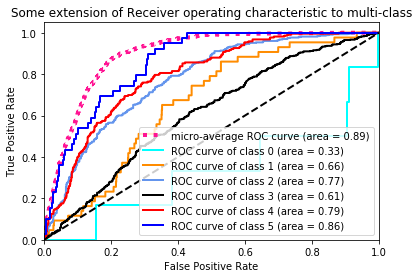

In [33]:
ROC(model)

## 使用SA

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
IntermediateLayer (Dense)    (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 28        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 1s 133us/step - loss: 2.5336 - acc: 0.2944 - val_loss: 2.1303 - val_acc: 0.2433
Epoch 2/50
4157/4157 [==============================] - 0s 91us/step - loss: 1.9670 - acc: 0

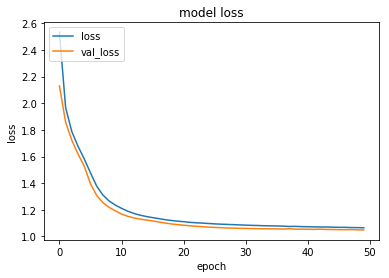

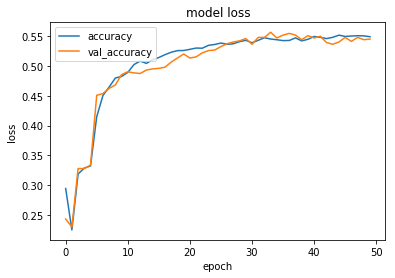

fail!
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 101us/step - loss: 1.0641 - acc: 0.5559 - val_loss: 1.0489 - val_acc: 0.5413
Epoch 2/50
4157/4157 [==============================] - 0s 94us/step - loss: 1.0631 - acc: 0.5518 - val_loss: 1.0486 - val_acc: 0.5394
Epoch 3/50
4157/4157 [==============================] - 0s 98us/step - loss: 1.0633 - acc: 0.5545 - val_loss: 1.0478 - val_acc: 0.5423
Epoch 4/50
4157/4157 [==============================] - 0s 95us/step - loss: 1.0615 - acc: 0.5530 - val_loss: 1.0470 - val_acc: 0.5413
Epoch 5/50
4157/4157 [==============================] - 0s 102us/step - loss: 1.0604 - acc: 0.5576 - val_loss: 1.0478 - val_acc: 0.5365
Epoch 6/50
4157/4157 [==============================] - 0s 98us/step - loss: 1.0604 - acc: 0.5533 - val_loss: 1.0467 - val_acc: 0.5462
Epoch 7/50
4157/4157 [==============================] - 0s 93us/step - loss: 1.0599 - acc: 0.5586 - val_loss: 1.0471 - val_acc: 0.5413

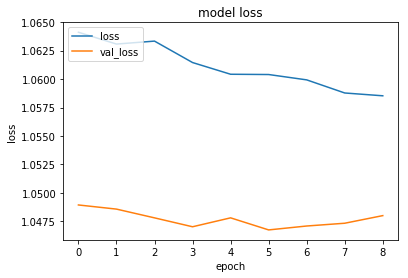

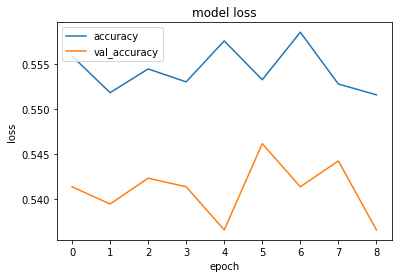

improve!
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 91us/step - loss: 1.1623 - acc: 0.5143 - val_loss: 1.0950 - val_acc: 0.5298
Epoch 2/50
4157/4157 [==============================] - 0s 92us/step - loss: 1.0987 - acc: 0.5345 - val_loss: 1.0784 - val_acc: 0.5221
Epoch 3/50
4157/4157 [==============================] - 0s 87us/step - loss: 1.0858 - acc: 0.5393 - val_loss: 1.0725 - val_acc: 0.5462
Epoch 4/50
4157/4157 [==============================] - 0s 87us/step - loss: 1.0795 - acc: 0.5453 - val_loss: 1.0678 - val_acc: 0.5442
Epoch 5/50
4157/4157 [==============================] - 0s 90us/step - loss: 1.0752 - acc: 0.5446 - val_loss: 1.0643 - val_acc: 0.5481
Epoch 6/50
4157/4157 [==============================] - 0s 86us/step - loss: 1.0724 - acc: 0.5456 - val_loss: 1.0619 - val_acc: 0.5433
Epoch 7/50
4157/4157 [==============================] - 0s 105us/step - loss: 1.0700 - acc: 0.5437 - val_loss: 1.0616 - val_acc: 0.53

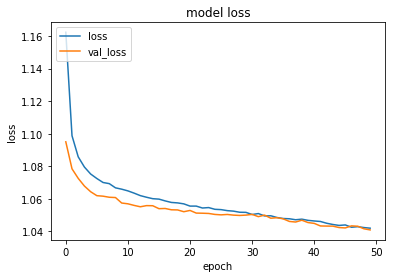

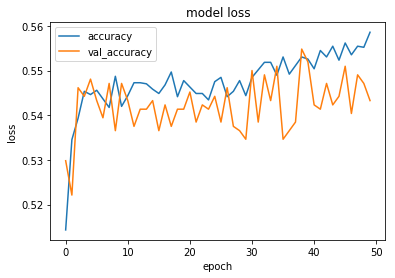

fail!
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 98us/step - loss: 1.0410 - acc: 0.5595 - val_loss: 1.0412 - val_acc: 0.5452
Epoch 2/50
4157/4157 [==============================] - 0s 97us/step - loss: 1.0399 - acc: 0.5627 - val_loss: 1.0396 - val_acc: 0.5510
Epoch 3/50
4157/4157 [==============================] - 1s 128us/step - loss: 1.0391 - acc: 0.5617 - val_loss: 1.0415 - val_acc: 0.5529
Epoch 4/50
4157/4157 [==============================] - 1s 122us/step - loss: 1.0401 - acc: 0.5559 - val_loss: 1.0389 - val_acc: 0.5529
Epoch 5/50
4157/4157 [==============================] - 0s 106us/step - loss: 1.0386 - acc: 0.5595 - val_loss: 1.0382 - val_acc: 0.5548
Epoch 6/50
4157/4157 [==============================] - 0s 94us/step - loss: 1.0387 - acc: 0.5554 - val_loss: 1.0378 - val_acc: 0.5558
Epoch 7/50
4157/4157 [==============================] - 0s 96us/step - loss: 1.0382 - acc: 0.5574 - val_loss: 1.0379 - val_acc: 0.554

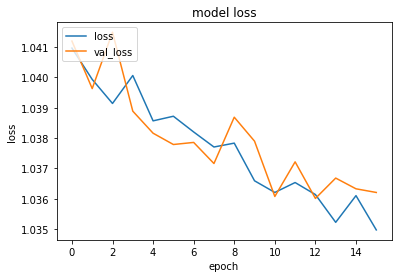

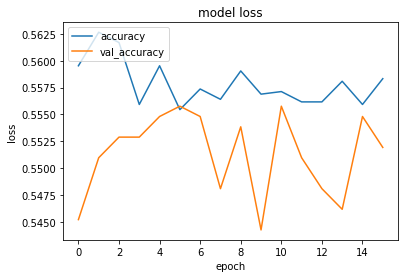

fail!
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 86us/step - loss: 1.0355 - acc: 0.5591 - val_loss: 1.0369 - val_acc: 0.5442
Epoch 2/50
4157/4157 [==============================] - 0s 84us/step - loss: 1.0355 - acc: 0.5579 - val_loss: 1.0367 - val_acc: 0.5529
Epoch 3/50
4157/4157 [==============================] - 0s 90us/step - loss: 1.0352 - acc: 0.5554 - val_loss: 1.0361 - val_acc: 0.5481
Epoch 4/50
4157/4157 [==============================] - 0s 89us/step - loss: 1.0346 - acc: 0.5562 - val_loss: 1.0364 - val_acc: 0.5548
Epoch 5/50
4157/4157 [==============================] - 0s 88us/step - loss: 1.0346 - acc: 0.5557 - val_loss: 1.0369 - val_acc: 0.5519
Epoch 6/50
4157/4157 [==============================] - 0s 88us/step - loss: 1.0340 - acc: 0.5591 - val_loss: 1.0418 - val_acc: 0.5471
Restoring model weights from the end of the best epoch
Epoch 00006: early stopping


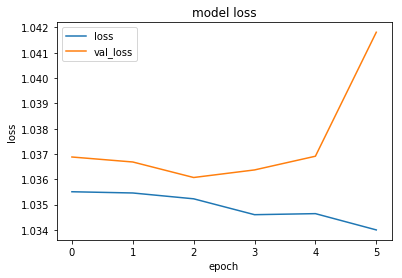

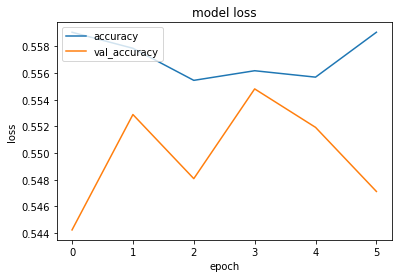

fail!
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 110us/step - loss: 1.0353 - acc: 0.5554 - val_loss: 1.0361 - val_acc: 0.5510
Epoch 2/50
4157/4157 [==============================] - 0s 96us/step - loss: 1.0347 - acc: 0.5564 - val_loss: 1.0362 - val_acc: 0.5510
Epoch 3/50
4157/4157 [==============================] - 0s 105us/step - loss: 1.0342 - acc: 0.5595 - val_loss: 1.0370 - val_acc: 0.5500
Epoch 4/50
4157/4157 [==============================] - 0s 110us/step - loss: 1.0344 - acc: 0.5562 - val_loss: 1.0384 - val_acc: 0.5481
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


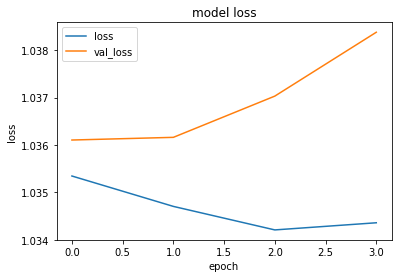

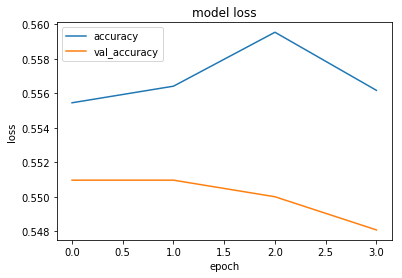

fail!
Train on 4157 samples, validate on 1040 samples
Epoch 1/50
4157/4157 [==============================] - 0s 87us/step - loss: 1.0342 - acc: 0.5554 - val_loss: 1.0362 - val_acc: 0.5500
Epoch 2/50
4157/4157 [==============================] - 0s 99us/step - loss: 1.0345 - acc: 0.5579 - val_loss: 1.0365 - val_acc: 0.5452
Epoch 3/50
4157/4157 [==============================] - 0s 93us/step - loss: 1.0343 - acc: 0.5600 - val_loss: 1.0374 - val_acc: 0.5510
Epoch 4/50
4157/4157 [==============================] - 0s 88us/step - loss: 1.0338 - acc: 0.5547 - val_loss: 1.0364 - val_acc: 0.5481
Restoring model weights from the end of the best epoch
Epoch 00004: early stopping


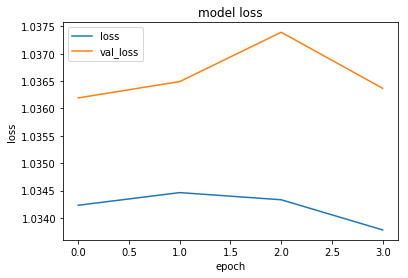

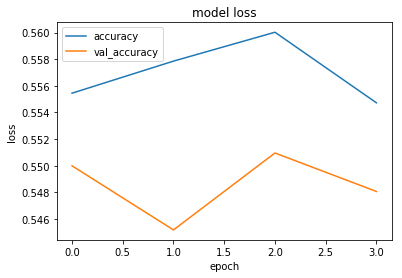

fail!


In [36]:
# Initialize
model = ModelCompile()
init_weights = model.get_weights() 
structure, weights =FlattenWeights(init_weights) # 拉平初始權重
Optimize_SA(model = model, score=score,init_weights=weights,structure=structure,iterL=100) # SA 找一個好的初始解

# BestAUC = score(model)
BestACC = score(model)
BestWeight = model.get_weights()
NoImproveTimes = 0

while True :
    
    #BP
    weights = model.get_weights() 
    model, weights = ModelFit(model=model, weights=weights, epochs=50)
    old_score = score(model)
    
    #丟進SA優化
    init_weights = model.get_weights()
    structure, weights =FlattenWeights(init_weights) # 拉平初始權重
    Optimize_SA(model = model, score=score,init_weights=weights,structure=structure,iterL=1000) # SA 找一個好的初始解
    new_score = score(model)
    
    #比較AUC 有無進步
    if new_score > old_score:
        BestAUC = score(model)
        BestWeight = model.get_weights()
        NoImproveTimes = 0
        print("improve!")
    else: 
        model.set_weights(init_weights)
        NoImproveTimes = NoImproveTimes + 1
        print("fail!")
        if NoImproveTimes == 5:
            break

In [38]:
Performance_multi(model)

Our accuracy is 52.77%
Our AUC is 75.51%


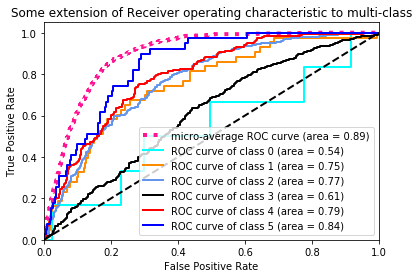

In [39]:
ROC(model)